## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')

In [4]:
df.shape

(400, 9)

In [5]:
df.sample(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
44,45,326,113,5,4.5,4.0,9.40,1,0.91
130,131,339,114,5,4.0,4.5,9.76,1,0.96
167,168,313,102,3,2.0,3.0,8.27,0,0.64


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.drop(columns=['Serial No.'],axis=1,inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
X=scaler.fit_transform(X)

In [12]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()

In [16]:
X_train.shape

(360, 7)

In [17]:
model.add(Dense(7,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [20]:
history = model.fit(X_train,y_train,epochs=100, batch_size=10,verbose=1, validation_split=0.2)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2868 - val_loss: 0.1831
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1650 - val_loss: 0.0992
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0944 - val_loss: 0.0661
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0680 - val_loss: 0.0549
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0542 - val_loss: 0.0465
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0523 - val_loss: 0.0393
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0420 - val_loss: 0.0337
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0357 - val_loss: 0.0296
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0319 - val_loss: 0.0263
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0270 - val_loss: 0.0239
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0268 - val_loss: 0.0217
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

In [21]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7457141360099955

In [23]:
history.history

{'loss': [0.2511138319969177,
  0.14902187883853912,
  0.0951465293765068,
  0.07052451372146606,
  0.0585329607129097,
  0.04959031566977501,
  0.04254249110817909,
  0.03673984110355377,
  0.03201982006430626,
  0.0280989371240139,
  0.02506966143846512,
  0.022397039458155632,
  0.020173273980617523,
  0.0183778777718544,
  0.016860244795680046,
  0.01547801960259676,
  0.014254172332584858,
  0.013156663626432419,
  0.012236488983035088,
  0.011429539881646633,
  0.010808276943862438,
  0.01016460731625557,
  0.009662176482379436,
  0.009170341305434704,
  0.008765279315412045,
  0.008389351889491081,
  0.008010059595108032,
  0.00770323071628809,
  0.007361113093793392,
  0.007092796266078949,
  0.006843947805464268,
  0.006652725860476494,
  0.006488331127911806,
  0.006282894406467676,
  0.0061437273398041725,
  0.006013923324644566,
  0.005882015451788902,
  0.005760112311691046,
  0.005619223695248365,
  0.005525527987629175,
  0.005411458667367697,
  0.0053990003652870655,
  

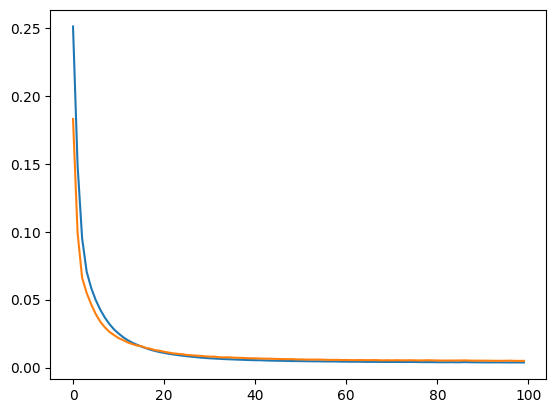

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])